In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Read the City and Ride Data
city_data_to_load = pd.read_csv("data/city_data.csv")
ride_data_to_load = pd.read_csv("data/ride_data.csv")

# Combine the data into a single dataset
combined_data = pd.merge(city_data_to_load, ride_data_to_load, on="city")

# Display the data table for preview
# city_data_to_load.head()
# ride_data_to_load.head()
combined_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [2]:
# Count by City:
type_counts = combined_data.groupby(["city","type"]).count()
type_count = type_counts["ride_id"]
drivercounts = combined_data.groupby(["city","type"]).sum()
drivercount = drivercounts["driver_count"]
# Average fare by City:
fare_type = combined_data.loc[:, ["city", "fare", "type"]]
fare_type = fare_type.groupby(["city","type"]).mean()
# Data for plot:
plot1_data = pd.concat([fare_type,type_count,drivercount],axis=1,sort=True)
plot1_data = plot1_data.reset_index(level=[0,1])
plot1_data.head()

,city,type,fare,ride_id,driver_count
0,Amandaburgh,Urban,24.641667,18,216
1,Barajasview,Urban,25.332273,22,572
2,Barronchester,Suburban,36.422500,16,176
3,Bethanyland,Suburban,32.956111,18,396
4,Bradshawfurt,Rural,40.064000,10,70


## Total Fares by City Type

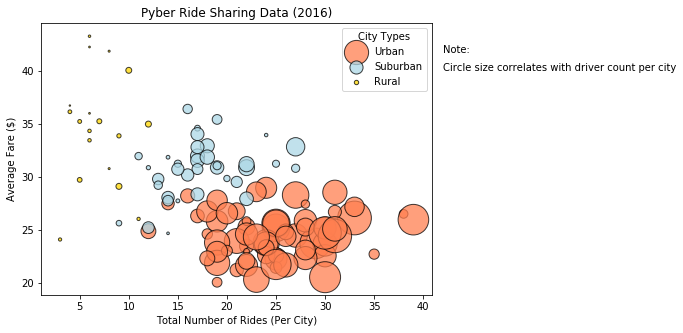

In [3]:
# Build the scatter plots for each city types
u = plot1_data[plot1_data["type"] == "Urban"]
s = plot1_data[plot1_data["type"] == "Suburban"]
r = plot1_data[plot1_data["type"] == "Rural"]

plt.figure(figsize=(7,5))

plt.scatter(x=u["ride_id"], y=u["fare"],marker="o", c="coral", edgecolors="black",s=0.5*u["driver_count"], alpha = 0.75, label="Urban")
plt.scatter(x=s["ride_id"], y=s["fare"],marker="o", c="lightblue", edgecolors="black",s=0.5*s["driver_count"], alpha = 0.75, label="Suburban")
plt.scatter(x=r["ride_id"], y=r["fare"],marker="o", c="gold", edgecolors="black",s=0.5*r["driver_count"], alpha = 0.75, label="Rural")
# Create a legend
plt.legend(title="City Types")

# Incorporate a text label regarding circle size
plt.annotate("Note:", xy = (42,41.75),annotation_clip=False)
plt.annotate("Circle size correlates with driver count per city", xy = (42,40),annotation_clip=False)
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")

# Save Figure
fig1 = plt.gcf()
fig1.savefig("../Images/Ride_Sharing_Bubble_Plot.png",bbox_inches='tight')

# Show Figure
plt.show()

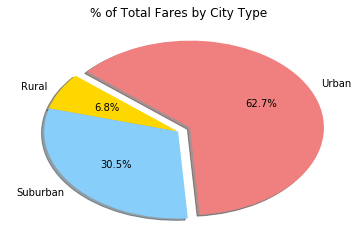

In [4]:
# Calculate Type Percents
total_fare = combined_data.groupby("type").sum()
total_fare1 = total_fare["fare"]
tot = 100*total_fare["fare"]/total_fare1.sum()
total_fare["pct"] = tot.values
total_fare = total_fare.reset_index(level=0)
# Build Pie Chart
labels = total_fare["type"]
sizes = total_fare["pct"]
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0.1)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("% of Total Fares by City Type")

# Save Figure
pie = plt.gcf()
pie.savefig("../Images/Total_Fares_by_City_Type.png",bbox_inches='tight')

# Show Figure
plt.show()

## Total Rides by City Type

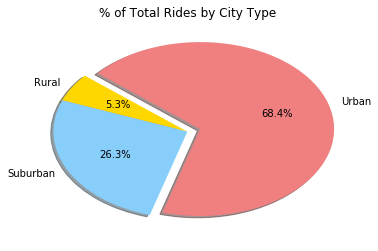

In [5]:
# Calculate Ride Percents
total_rides = combined_data.groupby("type").count()
total_ride = total_rides.reset_index(level=[0])
total_rides1 = combined_data["ride_id"].count()
tot_ride = 100*total_ride["ride_id"]/total_rides1
total_ride["pct_ride"] = tot_ride
# Build Pie Chart
labels = total_ride["type"]
sizes = total_ride["pct_ride"]
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0.1)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")

# Save Figure
pie = plt.gcf()
pie.savefig("../Images/Total_Rides_by_City_Type.png",bbox_inches='tight')

# Show Figure
plt.show()

## Total Drivers by City Type

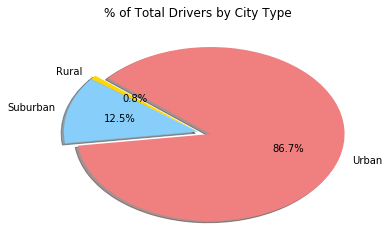

In [6]:
# Calculate Driver Percents
total_drivers = combined_data.groupby("type").sum()
total_drivers1 = total_drivers["driver_count"]
tot_drivers = 100*total_drivers["driver_count"]/total_drivers1.sum()
total_drivers["pct"] = tot_drivers.values
total_drivers = total_drivers.reset_index(level=0)
# Build Pie Charts
labels = total_drivers["type"]
sizes = total_drivers["pct"]
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0.1)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type")

# Save Figure
pie = plt.gcf()
pie.savefig("../Images/Total_Drivers_by_City_Type.png",bbox_inches='tight')

# Show Figure
plt.show()

In [ ]:
#On average, urban settings have the most number of rides and cheaper fares

In [ ]:
#Rural fares tend to be the highest price

In [ ]:
#The majority of total fares, rides, and drivers are in urban settings.